In [1]:
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from numpy import ndarray

%run hidden_neuron.py
%run input_neuron.py
%run input_layer.py
%run hidden_layer.py
%run output_neuron.py
%run output_layer.py
%run neural_network.py
%run training.py

from input_layer    import InputLayer
from hidden_layer   import HiddenLayer
from output_layer   import OtputLayer
from neural_network import DiadicNetwork
from training       import ErrorFunction


In [2]:
def show_matrix ( array: ndarray) -> None:
    "Visualise 2d matrix."

    size = tuple(int(x *0.3) for x in array.shape)

    _, ax = plt.subplots(figsize = size)
    
    sns.heatmap(
                array, 
                annot  = True, 
                cbar   = False, 
                cmap   = sns.cubehelix_palette(as_cmap=True),
                ax     = ax,
                
                xticklabels = False,
                yticklabels = False
    )


def plot_graph (adj_matrix: ndarray) -> None:
     "Plot graph from adjacency matrix."

     size  = tuple(int(x *0.5) for x in adj_matrix.shape)

     _, ax = plt.subplots(figsize = size)
    
     
     G = nx.from_numpy_array(adj_matrix)
     nx.draw(G, with_labels=True, node_size=300, node_color="skyblue", pos=nx.spring_layout(G), ax = ax)
     plt.show()
     

def matrix ( size: tuple, min: float|int, max: float|int, seed: int) -> ndarray:
    " Get random initialised 2d matrix."
    
    rng =  np.random.default_rng( seed = seed)
    
    if isinstance(min, int) and isinstance(max, int):
         return rng.integers(low = min, high =  max, size = size)
    else:
         return rng.random(low = min, high =  max, size = size)

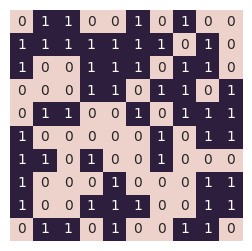

In [3]:
mat = matrix((10,10), min = 0, max = 2, seed = 42)
show_matrix(mat)

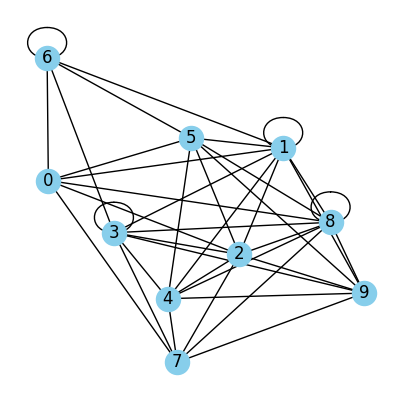

In [4]:
plot_graph(mat)

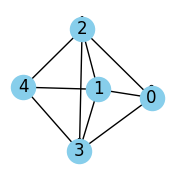

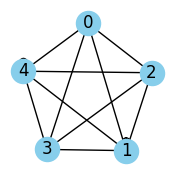

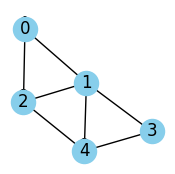

In [5]:
network_partition = [matrix((5,5), min = 0, max  = 2, seed = i) for i in range(3)]

for mat in network_partition:
    plot_graph(mat)

In [6]:
matricies = [matrix((5,5), min = 0, max  = 2, seed = i) for i in range(3)]
ids       = [(1,2),(1,1),(1,3)]

In [7]:
net_args = {

'input_ids':           ids,
'feature_list':        ['average_clustering'],
'network_partition':   dict(zip(ids, matricies)),
'factor_data':         np.array([100,123,97]),
'input_to_hidden_map': {
                         (1,2): [(1,2), (1,1)],
                         (1,1): [(1,1)],
                         (1,3): [(1,3), (1,1)]
                         
                        }

}

input_args = { 
                  'neuron_ids':          ids,
                  'feature_list':       ['average_clustering'],
                  'network_partition':  dict(zip(ids, matricies))

}

In [8]:
input_l = InputLayer(**input_args)

for _, neuron in input_l.neuron_list.items():
    f = neuron.features
    print(f)

{'average_clustering': 0.9}
{'average_clustering': 1.0}
{'average_clustering': 0.7666666666666666}


In [9]:
hidden_args = {
                'input_to_hidden_map':   net_args['input_to_hidden_map'],
                'activation_function':  'expit',
                'input_layer':           input_l


}

In [10]:
hidden_l = HiddenLayer(**hidden_args)

In [11]:
hidden_w = {
    (1,2): np.random.normal(size = 4),
    (1,1): np.random.normal(size = 2),
    (1,3): np.random.normal(size = 4)
}

In [12]:
hidden_l(hidden_w)

In [13]:
output_args = {
                'hidden_layer': hidden_l,
                'factor_data':  np.array([0.5, 1.3, 0.233])
}

In [14]:
output_l = OtputLayer(**output_args)

In [15]:
network = DiadicNetwork(**net_args)

In [16]:
params = {
    'hidden': hidden_w,
    'output': np.random.normal(size = 3)
}

In [17]:
network(params)

290835.3553210558

In [18]:
err_f = ErrorFunction(network, np.random.normal(size = 100))

In [19]:
err_f(np.random.normal(size = 13))

0.9797728159152918

In [20]:
err_f.grad(np.random.normal(size = 13))

array([ 0.00011525,  0.00021695,  0.00032725,  0.00043429,  0.00041168,
        0.00038704, -0.00102994, -0.00186996, -0.00272245, -0.00336567,
       -0.00237043, -0.00227649, -0.0010546 ])

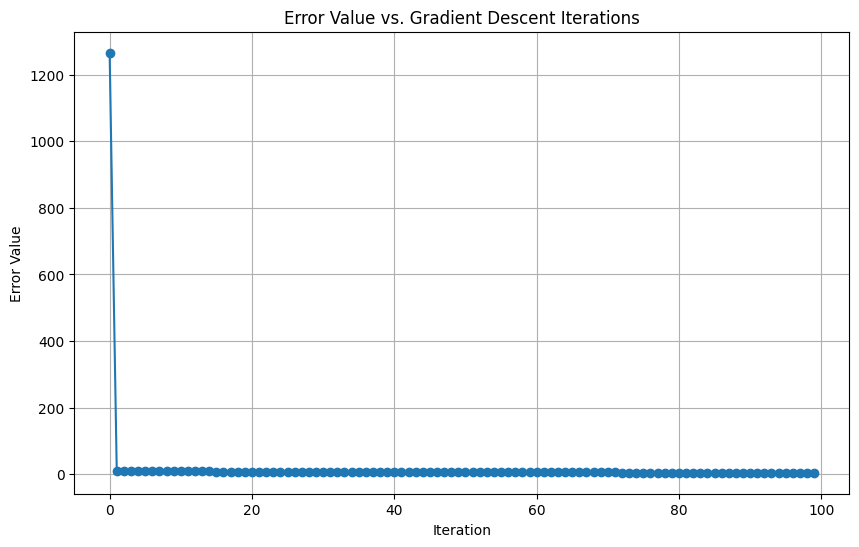

In [21]:
# gradient descent 

descent_param  = .00001
error          = ErrorFunction(network, np.random.normal(size = 100))

x0 = np.array(np.random.normal(size = 13))

error_values = []

for i in range(100):
    error_val = error(x0)
    error_values.append(error_val)  # Store the error
    x0 += -descent_param * error.grad(x0)

# Plotting the error values
plt.figure(figsize=(10, 6))
plt.plot(error_values, marker='o', linestyle='-')
plt.title('Error Value vs. Gradient Descent Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error Value')
plt.grid(True)
plt.show()


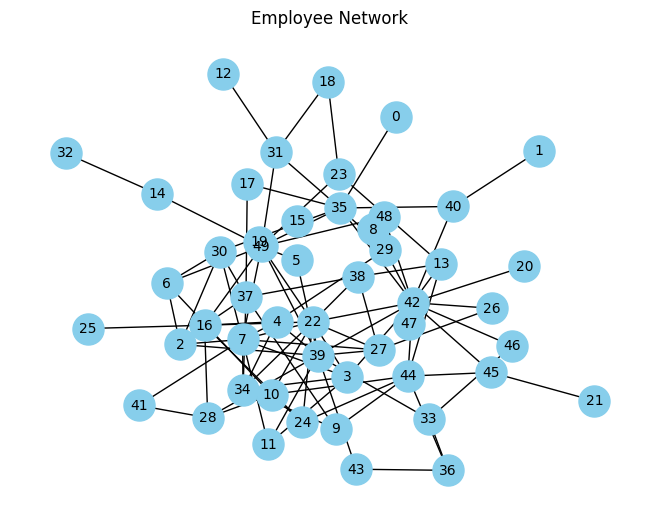

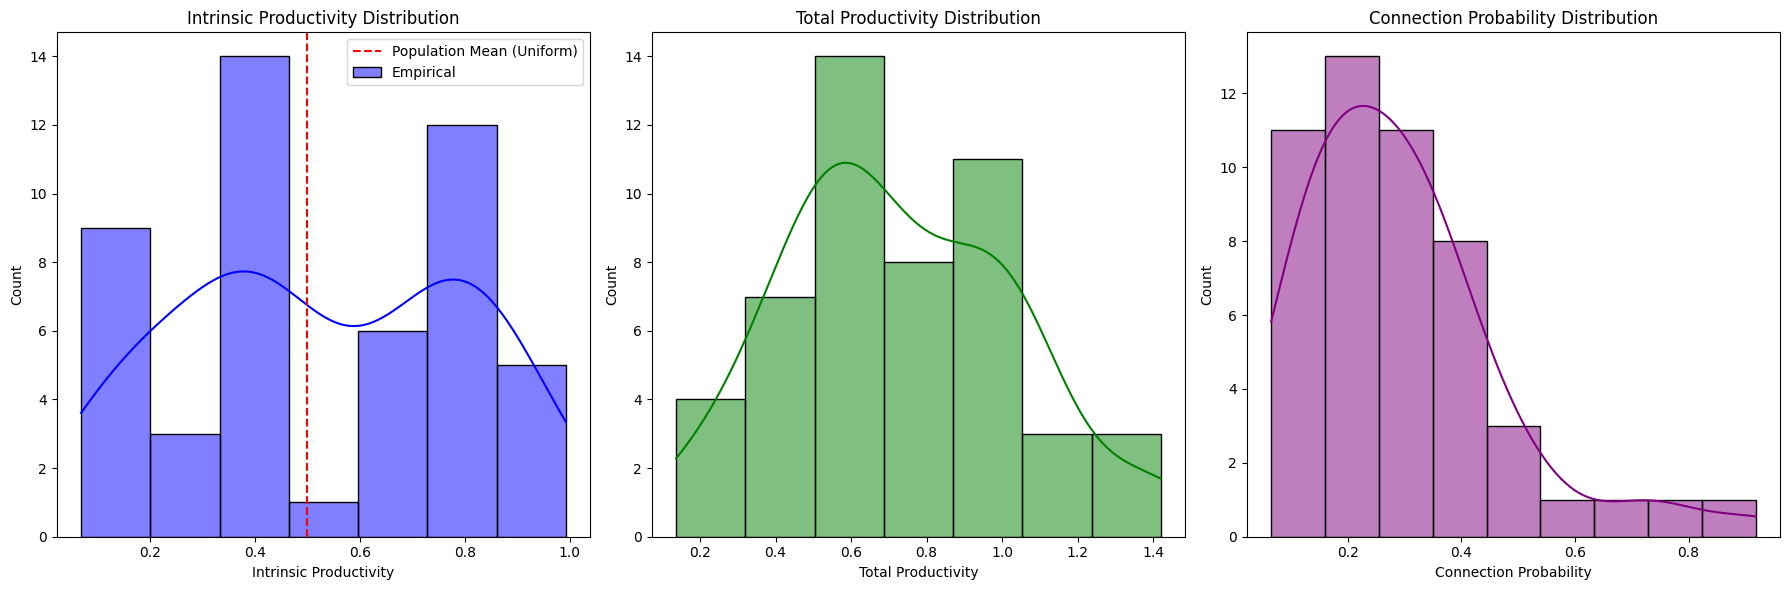

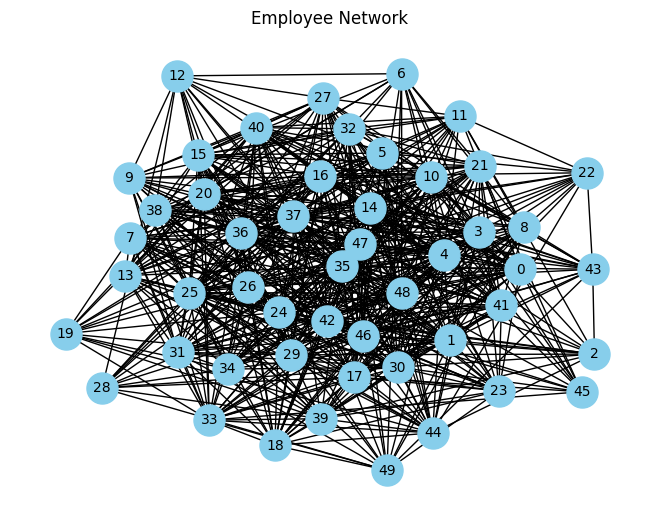

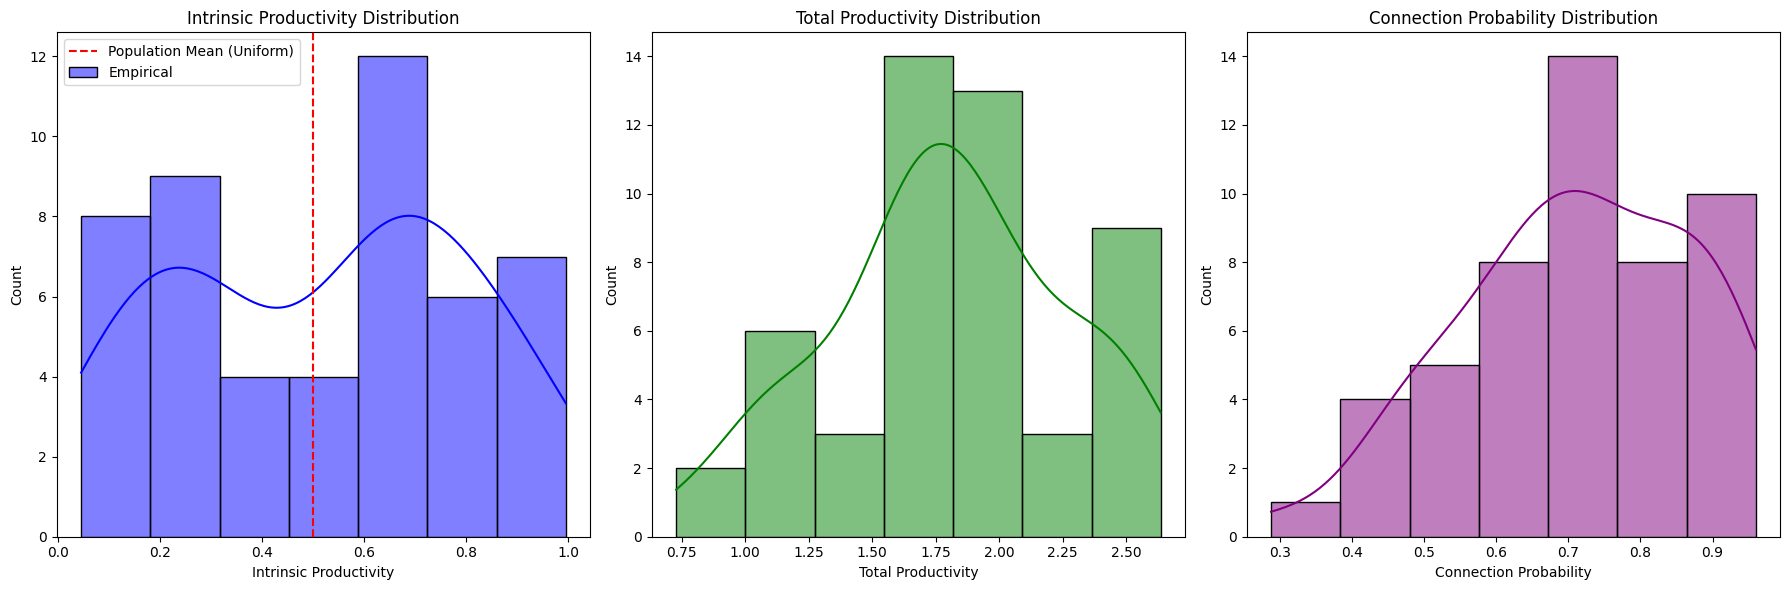

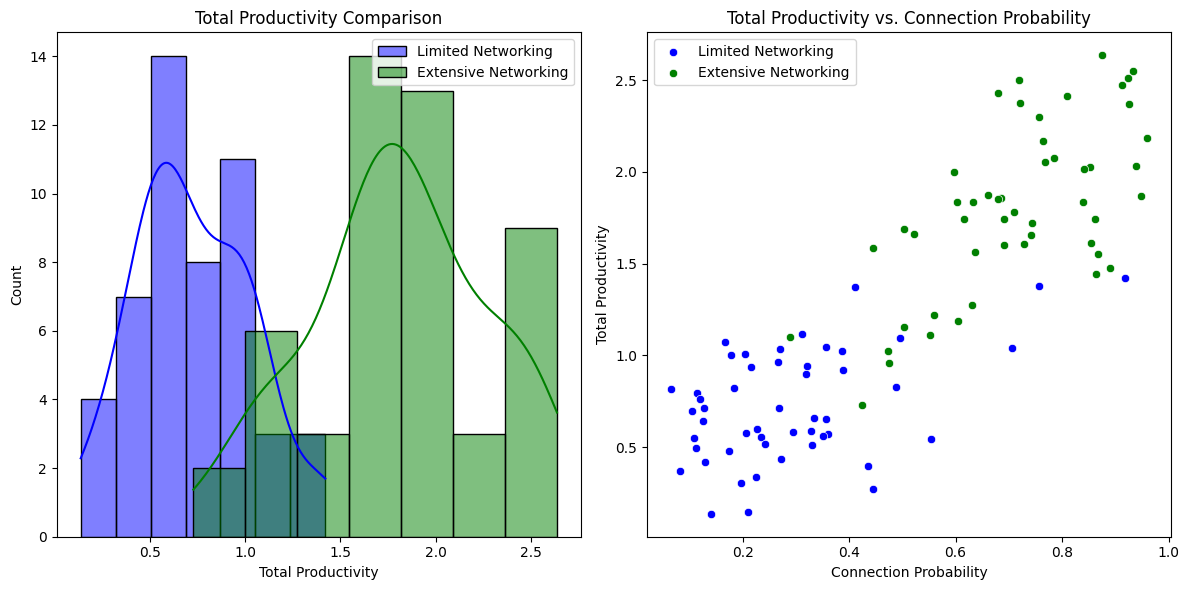

Scenario 1 (Limited Networking) Statistics:
count    50.000000
mean      0.726395
std       0.306821
min       0.136628
25%       0.522458
50%       0.678493
75%       0.957845
max       1.420361
Name: Total Productivity, dtype: float64

Scenario 2 (Extensive Networking) Statistics:
count    50.000000
mean      1.800691
std       0.461597
min       0.727768
25%       1.568824
50%       1.807176
75%       2.071117
max       2.636330
Name: Total Productivity, dtype: float64


In [22]:
from net_similator import NetSimulator

# Scenario 1: Limited Networking
simulator1 = NetSimulator(num_employees=50, connection_prob_params=(2, 5), productivity_boost=0.1)
results1 = simulator1.run_simulation()

# Scenario 2: Extensive Networking
simulator2 = NetSimulator(num_employees=50, connection_prob_params=(5, 2), productivity_boost=0.1)
results2 = simulator2.run_simulation()

# Comparative Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Total Productivity Comparison
sns.histplot(results1['Total Productivity'], kde=True, ax=axes[0], color='blue', label='Limited Networking')
sns.histplot(results2['Total Productivity'], kde=True, ax=axes[0], color='green', label='Extensive Networking')
axes[0].set_title('Total Productivity Comparison')
axes[0].legend()

# Scatter Plot: Total Productivity vs. Connection Probability
sns.scatterplot(x='Connection Probability', y='Total Productivity', data=results1, ax=axes[1], color='blue', label='Limited Networking')
sns.scatterplot(x='Connection Probability', y='Total Productivity', data=results2, ax=axes[1], color='green', label='Extensive Networking')
axes[1].set_title('Total Productivity vs. Connection Probability')
axes[1].legend()

plt.tight_layout()
plt.show()

# Statistical Summary
print("Scenario 1 (Limited Networking) Statistics:")
print(results1['Total Productivity'].describe())
print("\nScenario 2 (Extensive Networking) Statistics:")
print(results2['Total Productivity'].describe())

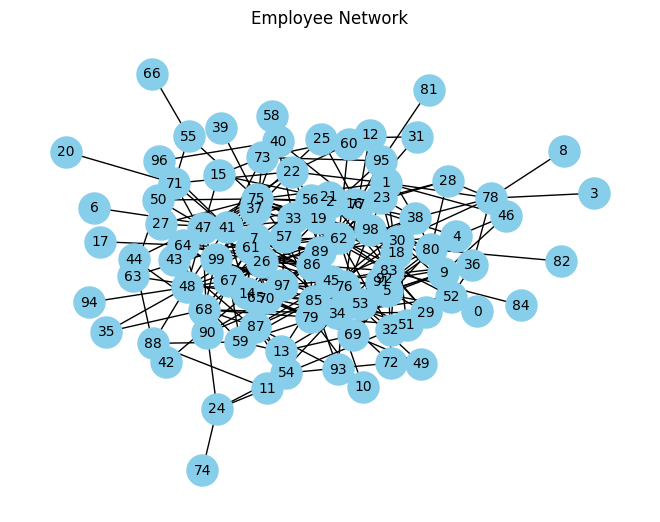

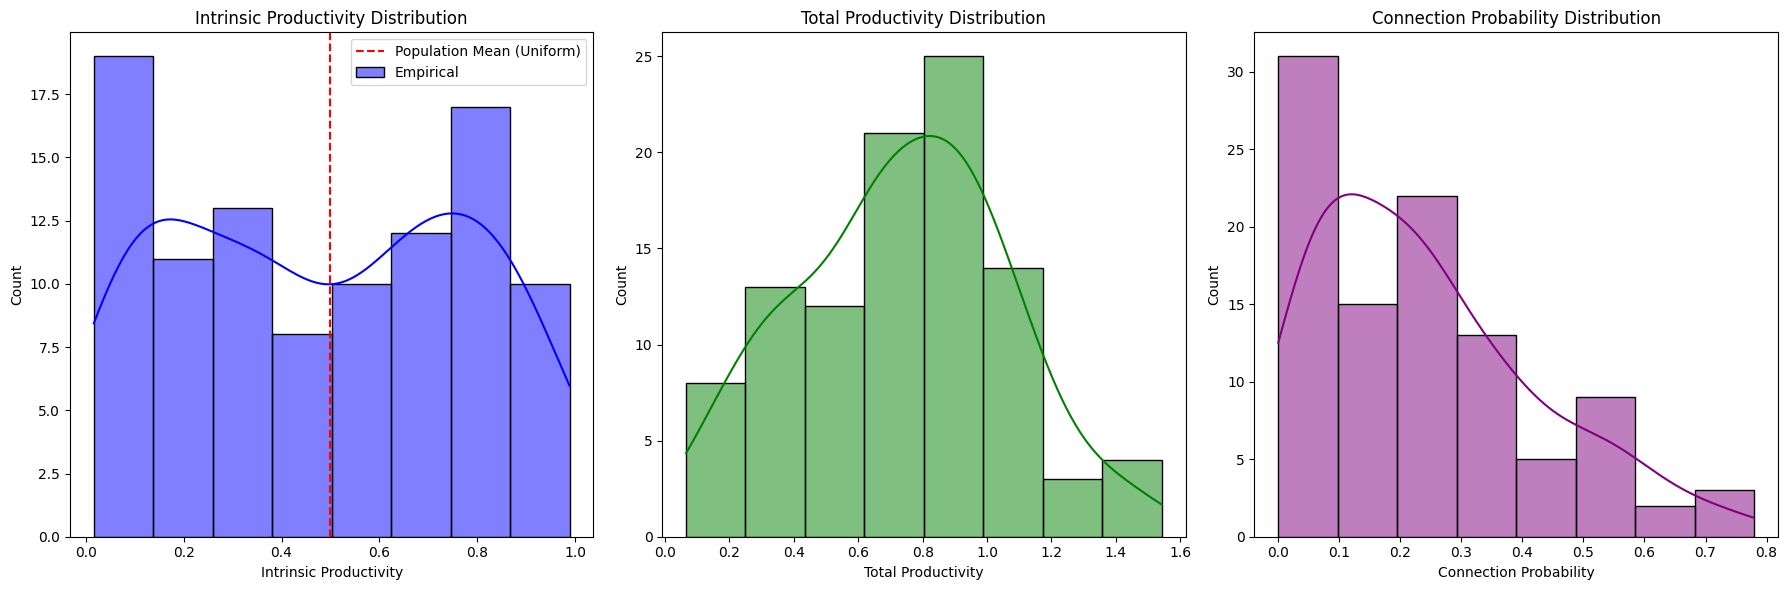

,Employee ID,Intrinsic Productivity,Total Productivity,Connection Probability
0,0,0.607380,0.747030,0.225101
1,1,0.745662,1.010686,0.232359
2,2,0.024419,0.373442,0.312604
3,3,0.876641,0.937146,0.085968
4,4,0.137195,0.562935,0.377758
...,...,...,...,...
95,95,0.359944,0.540426,0.167148
96,96,0.375364,0.413408,0.069868
97,97,0.578052,0.844835,0.241404
98,98,0.123645,0.323096,0.373965


In [23]:
# create training data

simulator = NetSimulator(num_employees=100, connection_prob_params=(1, 3), productivity_boost=0.1)

simulator.run_simulation()

In [24]:
matricies = [simulator.adj_mat]
ids       = [(1,1)]

net_args = {

'input_ids':           ids,
'feature_list':        ['average_clustering'],
'network_partition':   dict(zip(ids, matricies)),
'factor_data':         np.array([100]),
'input_to_hidden_map': {
                         (1,1): [(1,1)]
                        }

}

input_args = { 
                  'neuron_ids':          ids,
                  'feature_list':        ['average_clustering', 'number_of_nodes', 'number_of_edges', 'transitivity'],
                  'network_partition':  dict(zip(ids, matricies))

}

In [25]:
train_data = []
num_simulations = 10

for _ in range(num_simulations):  # Run multiple simulations
    simulator.run_simulation(visulals=False)

    adj_matrix = simulator.result_dict['Adjaceny Matrix']
    total_productivity =  simulator.result_dict['Total Product']  

    train_data.append((adj_matrix, total_productivity))

In [26]:
type(train_data[0][0])

numpy.ndarray

In [27]:
input_l.neuron_list[(1,1)].extractor.valid_stats

['average_clustering']

In [28]:
mat, out = train_data[0]

In [29]:
mat.shape

(100, 100)

In [30]:
input_l = InputLayer(**input_args)

for _, neuron in input_l.neuron_list.items():
    f = neuron.features
    print(f)

{'average_clustering': 0.09105373058314231, 'number_of_nodes': 100, 'number_of_edges': 281, 'transitivity': 0.1009549795361528}


In [31]:
nx.from_numpy_array(train_data[0][0])

In [32]:
input_l(train_data[0][0])

NetworkXError: Input array must be 2D, not 0

In [ ]:
network = DiadicNetwork(**net_args)

In [ ]:
from training import ErrorFunctionV2
# gradient descent 

descent_param  = .00001
error          = ErrorFunctionV2(network, train_data)

x0 = np.array(np.random.normal(size = 4))

error_values = []

for i in range(100):
    error_val = error(x0)
    error_values.append(error_val)  # Store the error
    x0 += -descent_param * error.grad(x0)

# Plotting the error values
plt.figure(figsize=(10, 6))
plt.plot(error_values, marker='o', linestyle='-')
plt.title('Error Value vs. Gradient Descent Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error Value')
plt.grid(True)
plt.show()
